# DONNÉES ADULT et similarité

Voici les librairies importées pour les besoins du projet.

In [1]:
# Import libraries 
import numpy as np # linear algebra
import pandas as pd # data processing,
# Libraries for data visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
#import statsmodels.api as sm


#classification
from sklearn.neighbors import KNeighborsClassifier #k-plus proches voisins

#Partitionnement
from sklearn.cluster import AgglomerativeClustering #Regroupement hiérarchique (Partitionnement binaire)
from pyclustering.cluster.kmedoids import kmedoids

#réduction de dimensionnalité
from sklearn.decomposition import KernelPCA #ce n'est pas PCoA mais on peut l'utiliser pour que le résultat soit le même
from sklearn.manifold import Isomap

### Data 

Nous avons débuté cette partie du projet en important les données ADULT pour passer ensuite à l'analyse des données. Pour cela nous avons commencé par attribuer des noms de colonnes plus adaptés pour faciliter notre analyse. Puisque dans notre jeu de données nous avons remarqué la présence de caractères spéciaux tels que "?" nous les avons supprimé afin que notre analyse soit la plus correcte possible; ceci constitue notre étape du nettoyage des données. Pour ainsi avoir un jeu de données sans caractères spéciaux nous avons éliminer les lignes qui contiennent ces cacactères en question.

In [2]:
#load the dataset provided
adult_data = pd.read_csv('./data/adult.csv')
# salary dataset info to find columns and count of the data
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
# Column names to be added
column_names = ['age',
                'workclass',
                'final weight',
                'education',
                'education num',
                'marital status',
                'occupation',
                'relationship',
                'race',
                'sex',
                'capital gain',
                'capital loss',
                'hours per week',
                'native country',
                'salary']
# Create DataFrame by assigning column names
df = pd.DataFrame(adult_data, columns = column_names)

# Add column names while reading a CSV file
df = pd.read_csv('./data/adult.csv', names=column_names)

# Add column names to existing DataFrame
df.columns = column_names

df = df.drop(labels=0, axis=0)
# View result
df

,age,workclass,final weight,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Finding the special characters in the data frame
df.isin(['?']).sum(axis=0)

age                  0
workclass         2799
final weight         0
education            0
education num        0
marital status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
native country     857
salary               0
dtype: int64

Les données ADULT que nous avons importé ne sont pas numériques. Dans le code qui suit nous allons les transformer en données numériques pour appliquer nos algorithmes de partitions et de classification. Mais avant cela nous voulons trier nos données de façon à ne garder que celles catégorielles et laisser tomber les données bruyantes. Nous récupérons donc le nombre de valeurs uniques pour chaque attribut. Cela nous permet de garder 8 attributs (workclass, education, marital status, occupation, relationship, race, sex, salary) qui sont des données catégorielles.

In [5]:
# We replace the special character to nan and then we drop the columns
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['native country'] = df['native country'].replace('?',np.nan)
# Dropping the NaN rows now
df.dropna(how='any',inplace=True)

# We run a loop of value_counts of each column to find out unique values.
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())
    
#Result
df

---- age ---
36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64
---- workclass ---
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
---- final weight ---
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
152234     1
171301     1
257764     1
168312     1
257302     1
Name: final weight, Length: 26741, dtype: int64
---- education ---
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education

,age,workclass,final weight,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,salary
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#Dropping based on uniquness of data from the dataset
#We only keep the categorical data
df.drop(['age',
         'final weight',
         'education num',
         'hours per week',
         'capital gain',
         'capital loss',
         'native country'], axis=1, inplace=True)

# View result with only the categorical data
df

,workclass,education,marital status,occupation,relationship,race,sex,salary
1,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
2,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
3,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
4,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
6,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K
...,...,...,...,...,...,...,...,...
48838,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
48839,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
48840,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
48841,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


Étant donnée que nos algorithmes ne sont pas fais pour être appliqués sur des données catégorielles, nous allons transformer nos colonnes d'étiquettes en colonnes indicatrices (comportant des 0 et des 1).

In [7]:
df1 = pd.get_dummies(df,columns=df.columns.values)
df1 = df1.drop(columns=['salary_>50K'])
df1 = df1[:10000]
df1

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10815,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
10816,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
10817,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
10818,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1


Nous pouvons à présent séparer notre jeu de données pour avoir un jeu de données pour l'entrainement et un autre pour le test.

In [8]:
#Split the data into 70% training and 30% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df1.drop(columns=['salary_<=50K']), df1['salary_<=50K'], test_size=0.30, random_state=42)

print('X_train: ' + str(np.shape(x_train)))
print('Y_train: ' + str(np.shape(y_train)))
print('X_test:  '  + str(np.shape(x_test)))
print('Y_test:  '  + str(np.shape(y_test)))

X_train: (7000, 57)
Y_train: (7000,)
X_test:  (3000, 57)
Y_test:  (3000,)


In [9]:
y_test

6768    1
5073    1
1883    0
5137    1
4894    0
       ..
8664    0
1165    1
3317    1
7022    1
5096    1
Name: salary_<=50K, Length: 3000, dtype: uint8

### Similarité 

La notion de similarité pour laquelle nous avons opté pour les données ADULT est une dissimilarité qui s'inspire de la généralisation de la distance euclidienne. La différence avec cette mesure est qu'au lieu de faire le trajet de x à y en passant par la diagonale, c'est-à-dire en suivant la loi de Pythagore, on suivra un arc de courbure plus important en fonction de la valeur de p. Dans notre cas nous avons choisi de travailler avec p = 5. Ainsi pour obtenir notre dissimilarité il suffit de soustraire la distance de minkowski à 1. 

In [10]:
from math import *
from decimal import Decimal
import numpy as np


def p_root(value, root):
    root_value = 1 / float(root)
    return round (Decimal(value) **
             Decimal(root_value), 3)
 
def minkowski_distance(x, y, p_value):
    x = x/50
    y = y/50
    return (p_root(sum(pow(abs(a-b), p_value)
            for a, b in zip(x, y)), p_value))

In [11]:
from time import time

In [12]:
def dissimilarity(x, y, *args, **kwargs):
    return 1 - minkowski_distance(x, y, 5)


def get_dissimilarity_matrix(X, Y=None):
    Y = X if Y is None else Y
    A = np.zeros((len(X), len(Y)))
    for i in range(len(X)) :
        for j in range(len(Y)) :
            A[i][j] = dissimilarity(X[i],Y[j])
    return A

Ici nous calculons le temps que prend notre machine pour calculer et retourner la matrice de dissimilarité. Nous avons mis en commentaire ce qu'on obtient

train_dissimilarity_1.shape = (7000, 7000)
Calculating the train dissimilarity matrix took: 10537.21 s


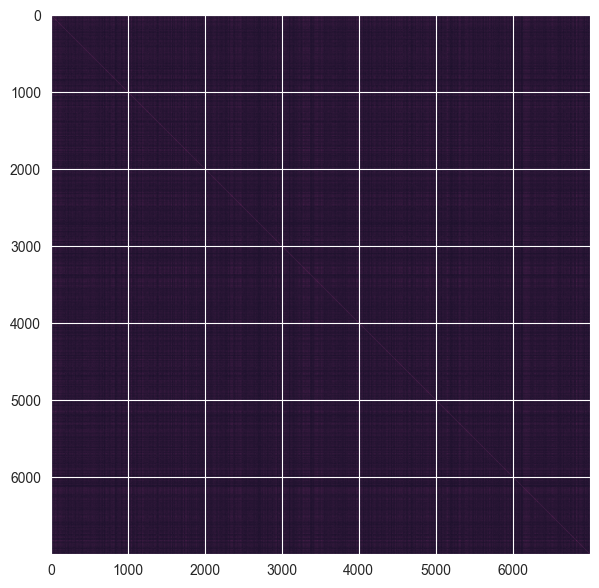

In [14]:
start = time()
train_dissimilarity = get_dissimilarity_matrix(x_train.values)
print(f'train_dissimilarity_1.shape = {train_dissimilarity.shape}')
plt.figure(figsize=(7,7)).add_subplot(1,1,1).imshow(train_dissimilarity);

#end = time()
#elapsed = end - start

print("Calculating the train dissimilarity matrix took: %.2f s" % (time() - start))
#Calculating the train dissimilarity matrix took: 10537.21 s (environ 2h 57 minutes)

test_dissimilarity.shape = (7000, 3000)
Calculating test dissimilarity matrix took: 4525.71 s


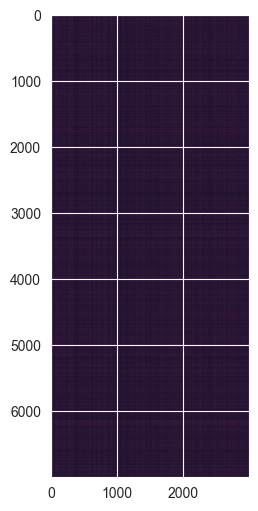

In [15]:
start = time()
test_dissimilarity = get_dissimilarity_matrix(x_train.values, x_test.values)
print(f'test_dissimilarity.shape = {test_dissimilarity.shape}')
plt.figure(figsize=(6,6)).add_subplot(111).imshow(test_dissimilarity);
test_dissimilarity = np.reshape(test_dissimilarity, (test_dissimilarity.shape[1], test_dissimilarity.shape[0]))
print("Calculating test dissimilarity matrix took: %.2f s" % (time() - start))
#Calculating test dissimilarity matrix took: 4525.71 s (environ 1h 25 minutes)

#### Isomap
Isomap est une méthode non linéaire de réduction de la dimensionnalité. C'est l'une des nombreuses méthodes d'intégration à basse dimension largement utilisées. Isomap est utilisé pour calculer un encastrement quasi-isométrique, de faible dimension, d'un ensemble de points de données de haute dimension. L'algorithme fournit une méthode simple pour estimer la géométrie intrinsèque d'un collecteur de données sur la base d'une estimation approximative des voisins de chaque point de données sur le collecteur


Isomap with train dissimilarity matrix took: 20.97 s
Isomap with test dissimilarity matrix took: 0.81 s


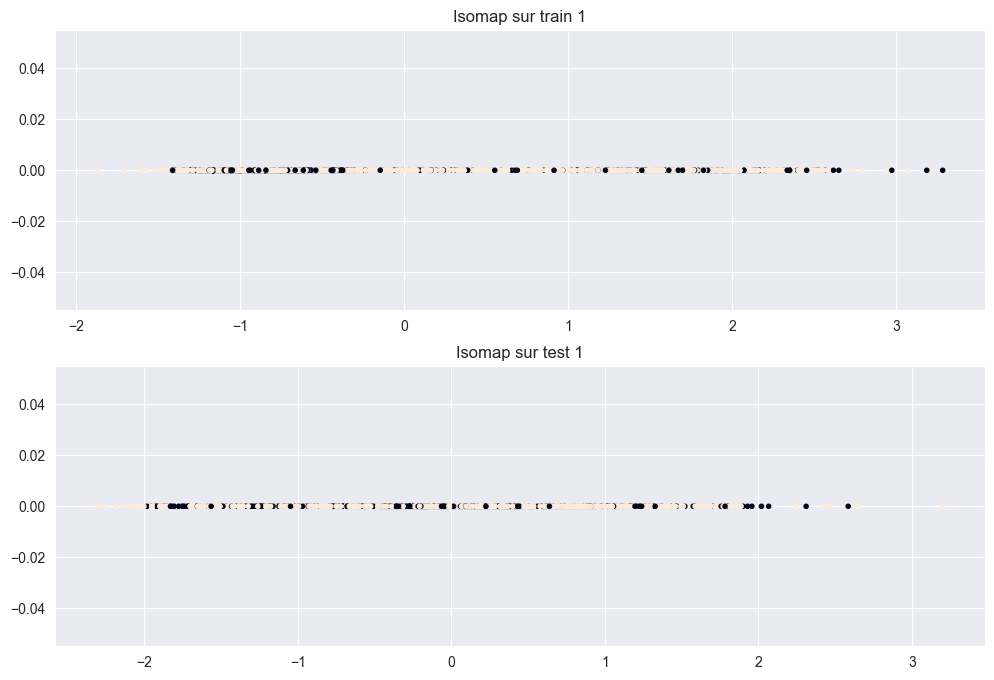

In [18]:
start = time()
isomap = Isomap(n_components=1, n_neighbors=5, metric='precomputed')
isomap_train = isomap.fit_transform(train_dissimilarity)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211)
ax.set_title('Isomap sur train 1')
ax.scatter(isomap_train, np.zeros_like(isomap_train), c=y_train.values, marker='.');
print("Isomap with train dissimilarity matrix took: %.2f s" % (time() - start))

start = time()
isomap_test = isomap.transform(test_dissimilarity)
ax = fig.add_subplot(212)
ax.set_title('Isomap sur test 1')
ax.scatter(isomap_test, np.zeros_like(isomap_test), c=y_test.values, marker='.');
print("Isomap with test dissimilarity matrix took: %.2f s" % (time() - start))

#Isomap with train dissimilarity matrix took: 20.97 s
#Isomap with test dissimilarity matrix took: 0.81 s

Isomap réduit la dimensionnalité tout en préservant la distance géodésique, c'est-à-dire que l'algorithme tient compte de la distance de voisinage entre 2 points. Le temps mis pour obtenir un résultat est plutôt raisonnable étant donné que nous n'avons pas un nombre élevé de dimensions. Dans l'affichage du résultat obtenu, nous voyons que notre algorithme a du mal à bien généraliser les données. En effet sur notre graphe, les points similaires ne distinguent pas réellement des autres et crée une certaine confusion sur la corrélation entre les données.

#### PCoA
Cette méthode est également une méthode de réduction de dimensionalité. Elle permet de tranformer des données corrélées en variables décorrélées les unes des autres. Ici bien qu'on parle de réduction de dimension, on veut pouvoir tout de même conserver une maximum d'informations.

PCoA with train dissimilarity matrix took: 2.75 s
PCoA with test dissimilarity matrix took: 0.45 s


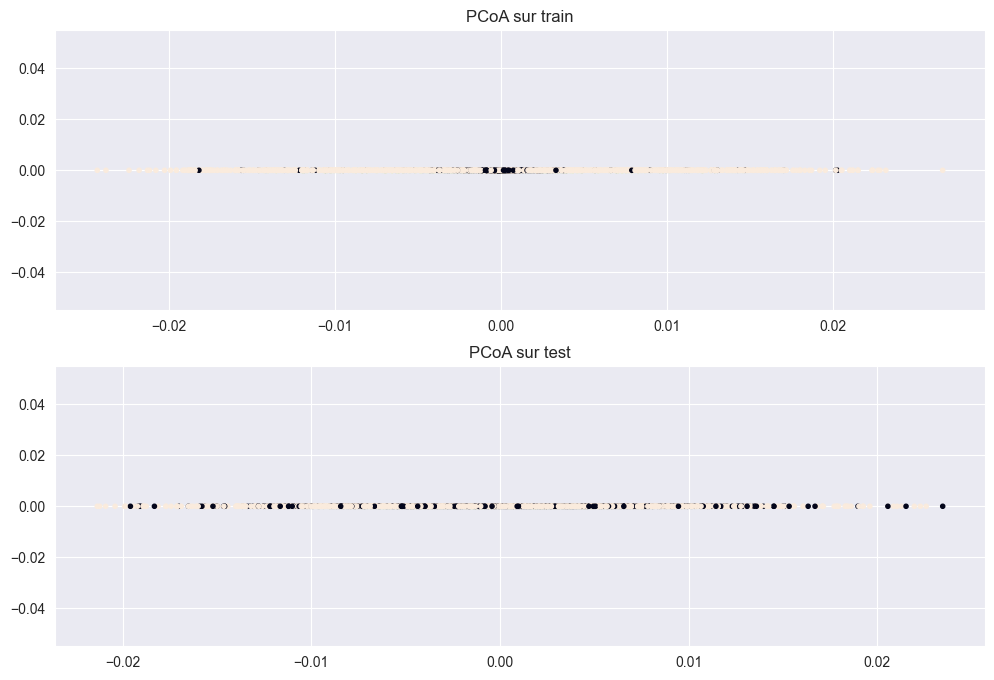

In [48]:
start = time()
pcoa = KernelPCA(n_components=1, kernel='precomputed')
pcoa_train = pcoa.fit_transform(-.5* train_dissimilarity**2) #-.5*D**2 est crucial!!!

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(211)
ax.set_title('PCoA sur train')
ax.scatter(pcoa_train, np.zeros_like(pcoa_train), c=y_train.values, marker='.');
print("PCoA with train dissimilarity matrix took: %.2f s" % (time() - start))

start = time()
pcoa_test = pcoa.transform(-.5* test_dissimilarity**2) #-.5*D**2 est crucial!!!
ax = fig.add_subplot(212)
ax.set_title('PCoA sur test')
ax.scatter(pcoa_test, np.zeros_like(pcoa_test), c=y_test.values, marker='.');
print("PCoA with test dissimilarity matrix took: %.2f s" % (time() - start))

Comme lors de l'exécution de l'algorithme Isomap, on peut voir que notre similarité appliquée à l'algorithme PCoA n'arrive pas à bien généraliser les données. Par contre avec l'algorithme de PCoA le temps mis pour obtenir un résultat est presque immédiat.

#### K-Médoids
Le partitionnement en k-médoïdes est une méthode de partitionnement plus robuste vis-à-vis des données aberrantes (outliers) que celle des k-moyennes (k-means). La différence majeure avec les k-moyennes est que le point central d'une classe est un point du jeu de données.


In [22]:
initial_medoids = [0,233,650]
kmedoids_instance = kmedoids(train_dissimilarity, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process() #training

kmedoids_train = kmedoids_instance.predict(train_dissimilarity)
kmedoids_test = kmedoids_instance.predict(test_dissimilarity)

print(f'Les médoids sont les points avec les indices {kmedoids_instance.get_medoids()} ')

C = []
for i in range(4):
    train_cluster = x_train.values[np.where(kmedoids_train == i)[0]]
    
    test_cluster = x_test.values[np.where(kmedoids_test == i)[0]]
    C.append(np.where(kmedoids_test == i)[0])
    print(np.where(kmedoids_test == i)[0])
C

Les médoids sont les points avec les indices [1007, 457, 5557] 
[   0    1    2 ... 2997 2998 2999]
[ 170  593  612  684  864  889  994 1022 1087 1259 1353 1553 1565 1611
 1683 1782 1911 1986 2168 2185 2348 2362 2381 2583 2745 2774 2896 2916
 2934 2979]
[ 110  175  286  327  343  362  392  503  596  647  687  725  779  840
  969 1077 1106 1153 1162 1207 1329 1350 1393 1444 1627 1751 1767 1813
 1896 1981 2007 2082 2120 2172 2229 2238 2295 2405 2508 2562 2564 2666
 2755 2777 2823 2873 2893]
[]


[array([   0,    1,    2, ..., 2997, 2998, 2999], dtype=int64),
 array([ 170,  593,  612,  684,  864,  889,  994, 1022, 1087, 1259, 1353,
        1553, 1565, 1611, 1683, 1782, 1911, 1986, 2168, 2185, 2348, 2362,
        2381, 2583, 2745, 2774, 2896, 2916, 2934, 2979], dtype=int64),
 array([ 110,  175,  286,  327,  343,  362,  392,  503,  596,  647,  687,
         725,  779,  840,  969, 1077, 1106, 1153, 1162, 1207, 1329, 1350,
        1393, 1444, 1627, 1751, 1767, 1813, 1896, 1981, 2007, 2082, 2120,
        2172, 2229, 2238, 2295, 2405, 2508, 2562, 2564, 2666, 2755, 2777,
        2823, 2873, 2893], dtype=int64),
 array([], dtype=int64)]

In [23]:
from sklearn.metrics import accuracy_score

predictions = np.array([0 for i in range(len(y_test))])
for i in C[0] :
    predictions[i] = 1

predictions

acc = accuracy_score(y_true=y_test, y_pred=predictions)
print(f"Accuracy for K-medoids algorithm: {acc}")
#Accuracy for K-medoids algorithm: 0.735

Accuracy for K-medoids algorithm: 0.735


En général cette méthode utilise la distance euclidienne, mais en implémentant notre nouvelle matrice de dissimilarité généralisée à 5 degrés, on arrive à impacter la méthode de classification et par suite générer de différents clusters. Avec notre nouvelle similarité on remarque que l’accuracy pour ce modèle ne change pas de manière très significatif en la comparant avec la similarité par défaut utilisé par le modèle, ce qui quand nous donne quand même une efficacité importante avec ce modèle (environ 73%).

#### Regroupement hiérarchique (Partitionnement binaire)
Les méthodes de regroupement hiérarchique partent d’une solution générale vers une autre plus spécifique. Les méthodes de cette catégorie démarrent avec une seule classe contenant la totalité puis se divisent à chaque étape selon un critère jusqu’à l’obtention d’un ensemble de classes différentes.
Initialement, chaque individu forme une classe, soit n classes. On cherche à réduire le nombre de classes à nb<n, ce qui se fait itérativement. À chaque étape, on fusionne deux classes, réduisant ainsi le nombre de classes. Les deux classes choisies pour être fusionnées sont celles qui sont les plus « proches », et ainsi de suite jusqu’à finir avec des clusters bien séparés.
Pour notre jeu de données, après quelques tests, nous avons opté pour 5 clusters afin d'obtenir un résultat plus ou moins significatif.

In [49]:
def agglomerative_clustering_predict(agglomerative_clustering, dissimilarity_matrix):
    average_dissimilarity = list()
    for i in range(agglomerative_clustering.n_clusters):
        ith_clusters_dissimilarity = dissimilarity_matrix[:, np.where(agglomerative_clustering.labels_==i)[0]]
        average_dissimilarity.append(ith_clusters_dissimilarity.mean(axis=1))
    return np.argmin(np.stack(average_dissimilarity), axis=0)

In [58]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='average')
agglomerative_clustering.fit(train_dissimilarity)

agglo_train = agglomerative_clustering_predict(agglomerative_clustering, train_dissimilarity)
agglo_test = agglomerative_clustering_predict(agglomerative_clustering, test_dissimilarity)


B = []
for i in range(3):
    
    
    train_cluster = x_train.values[np.where(agglo_train == i)[0]]
    
    test_cluster = x_test.values[np.where(agglo_test == i)[0]]
    B.append(np.where(agglo_test == i)[0])
    print(np.where(agglo_test == i)[0])


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[   5   14   80   92  117  158  159  227  231  236  269  303  306  312
  345  377  438  458  549  602  687  702  725  756  810  836  839  858
  864  866  909  915  951  956  983 1022 1070 1119 1137 1149 1160 1202
 1223 1251 1277 1311 1316 1340 1344 1371 1430 1482 1559 1641 1644 1646
 1656 1658 1659 1707 1793 1820 1821 1899 1920 1922 1944 1980 1998 2082
 2135 2136 2144 2250 2270 2283 2288 2309 2334 2466 2495 2498 2510 2537
 2538 2549 2565 2577 2603 2633 2679 2706 2714 2721 2825 2838 2868 2870
 2883 2891 2909]
[   3    9   16   17   18   23   30   36   37   41   56   58   59   60
   63   65   67   70   72   75   78   83   85   88   90   96   99  100
  103  110  113  123  127  129  131  132  135  138  142  144  145  148
  149  152  155  156  170  174  180  184  185  186  192  193  195  197
  198  201  203  204  209  210  212  215  216  218  220  234  235  239
  241  242  243  246  252  258  259  261  267  272  274  275  278  282
  286  287  288  294  300  301  316  318  324  327  330  332

[array([   5,   14,   80,   92,  117,  158,  159,  227,  231,  236,  269,
         303,  306,  312,  345,  377,  438,  458,  549,  602,  687,  702,
         725,  756,  810,  836,  839,  858,  864,  866,  909,  915,  951,
         956,  983, 1022, 1070, 1119, 1137, 1149, 1160, 1202, 1223, 1251,
        1277, 1311, 1316, 1340, 1344, 1371, 1430, 1482, 1559, 1641, 1644,
        1646, 1656, 1658, 1659, 1707, 1793, 1820, 1821, 1899, 1920, 1922,
        1944, 1980, 1998, 2082, 2135, 2136, 2144, 2250, 2270, 2283, 2288,
        2309, 2334, 2466, 2495, 2498, 2510, 2537, 2538, 2549, 2565, 2577,
        2603, 2633, 2679, 2706, 2714, 2721, 2825, 2838, 2868, 2870, 2883,
        2891, 2909], dtype=int64),
 array([   3,    9,   16,   17,   18,   23,   30,   36,   37,   41,   56,
          58,   59,   60,   63,   65,   67,   70,   72,   75,   78,   83,
          85,   88,   90,   96,   99,  100,  103,  110,  113,  123,  127,
         129,  131,  132,  135,  138,  142,  144,  145,  148,  149,  152,
   

In [59]:
from sklearn.metrics import accuracy_score

predictions = np.array([0 for i in range(len(y_test))])
for i in B[1] :
    predictions[i] = 1

predictions

acc = accuracy_score(y_true=y_test, y_pred=predictions)
print(f"Accuracy for agglomerative clustering algorithm: {acc}")

Accuracy for agglomerative clustering algorithm: 0.40166666666666667


La précision de l'algorithme est d'environ 40% avec 5 clusters. On a pu remarqué que plus le nombre de clusters est élévé et moins l'algorithme est précis. De manière analogique avec 2 clusters nous obtenons une précision d'environ 52%. Nous suspectons que cela soit dû à une conséquence de notre similarité du fait que des données qui sont assez proches deviennent apparaisssent éloignés et plus elles sont éloignées et plus elles apparaissent assez proche.

#### K-plus proches voisins


In [66]:
knn = KNeighborsClassifier(n_neighbors=2, metric='precomputed', algorithm='brute')
knn.fit(train_dissimilarity, y_train.values)

knn_train = knn.predict(train_dissimilarity)
knn_test = knn.predict(test_dissimilarity)

#fig = plt.figure(figsize=(12, 6))
#train_ax = fig.add_subplot(121)
#test_ax = fig.add_subplot(122)

A = []
for i in range(2):
    train_cluster = x_train.values[np.where(knn_train == i)[0]]
    #print(np.where(knn_train == i)[0])
    #train_ax.scatter(train_cluster[:, 0], train_cluster[:, 1])
    
    test_cluster = x_test.values[np.where(knn_test == i)[0]]
    A.append(np.where(knn_test == i)[0])
    print(np.where(knn_test == i)[0])
   # test_ax.scatter(test_cluster[:, 0], test_cluster[:, 1])


[   1    5    6 ... 2994 2998 2999]
[   0    2    3 ... 2995 2996 2997]


In [67]:
from sklearn.metrics import accuracy_score

predictions = np.array([0 for i in range(len(y_test))])
for i in A[0] :
    predictions[i] = 1

predictions

acc = accuracy_score(y_true=y_test, y_pred=predictions)
print(f"Accuracy for K-NN algorithm: {acc}")

Accuracy for K-NN algorithm: 0.4256666666666667


Ce modèle est le plus souvent utilisé avec la distance euclidienne, mais en implémentant la nouvelle matrice de similarité on change les bases de classification. On peut remarquer que la précision de l'algorithme est d'environ 42% lorsque k = 2 et plus k augmente et moins l'algorithme est précis. Alors dans le cas où le dataset est réuni et regroupé, vaut mieux travailler avec la distance euclidienne pour ne pas biaisé les mesures, en effet avec la distance généralisée, deux points proches s’avèrent être trop éloigné.
Alors pour des datasets pas trop corrélés, et bien éloigné sur le plan suivant une distribution hasardeuse, il serait préférable de travailler avec une distance plus généralisée, qui prenne en compte cette répartition en mesures afin d’augmenter la qualité des modèles.

### CONCLUSION
En appliquant notre similarité sur les différents algorithmes nous avons pu en conclure que notre similarité avait du mal à généraliser les données comme il le fallait notamment sur les algorithmes de réduction de dimensionalité. Vu comment notre similarité est faite, le rayon de courbure s'accentue lorsqu'on a des données qui sont très proches ce qui les fait paraître en réalité éloignées. De la même façon lorsque les données ont moins de points en communs notre similarité les identifient comme similaires. Cette similarité a une efficacité moyenne pour faire des regroupements. L'efficacité est fonction du nombre de clusters, plus ce nombre est grand et moins l'algorithme est précis. Cela semble logique car un groupe qui serait formé de 2 clusters par exemple aurait une moyenne élévée du fait qu'il soit plus probable d'avoir des données assez proche. Il n'y a que pour l'algorithme du k-medoïdes que notre similarité nous donne une précision élevée et se trouve être proche de la distance euclidienne. De toutes nos observations il savère que notre similarité n'est très efficace sur notre jeu de données ADULT. Une distance euclidienne reste assez optimale pour ce genre de données et permettrait d'avoir de meilleures précisions.